# Avaliação Intermediária

NOME: Ana Helena Caiafa
E-MAIL: anahc3@al.insper.edu.br

Esta é a A.I. de Álgebra Linear e Teoria da Informação de 2s2023.



INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material presente no seu computador ou online, mas não pode consultar qualquer colega ou pessoa humana, presente ou não na prova.
* Não é permitida a utilização de geradores de texto, como o GPT-3 ou o copilot.
* O envio da prova será fechado às 11h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from matplotlib.patches import Rectangle
import pandas as pd

## Exercício 1

* Peso: 2 pontos

Dadas as matrizes e equações abaixo:

$$
A = \begin{bmatrix} 1 & 7\\ 3 & 2 \end{bmatrix} \\
$$

$$
B = \begin{bmatrix} 4 & 9\\ 8 & 2 \end{bmatrix} \\
$$

$$
C = AB \\
$$

$$
D = BA 
$$

$$
ABXDD^{-1} = CDBAD^{-1}
$$

responda:

A. Qual é o valor de $X$?

B. Qual é a menor quantidade de multiplicações matriciais necessárias para descobrir o valor de $X$? (Imagine que fôssemos calcular manualmente )

In [4]:
# A
A = np.array([[1, 7], [3, 2]])
B = np.array([[4, 9], [8, 2]])

X = B @ A

X

array([[31, 46],
       [14, 60]])

B. Precisamos realizar somente uma multiplicação matricial, isso porque podemos simplificar de tal forma que sobre somente a multiplicação BA, assim como mostrarei as passagens a seguir:

$$
ABXDD^{-1} = CDBAD^{-1}
$$

$$
CX = CDDD^{-1}
$$

$$
C^{-1}CX = C^{-1}CD
$$

$$
X = D
$$

$$
X = BA
$$

Transformei os 'BA' em D e os 'AB' em C, dessa forma fica mais fácil de realizar as transformações necessárias. A multiplicação de uma matriz pela sua inversa resulta na matriz identidade, por isso podemos 'sumir' com ela.

# Exercício 2

* Peso: 3 pontos

Transforme a primeira imagem na segunda imagem utilizando transformações matriciais.

*Dica*: A área da segunda imagem é quatro vezes maior que a da primeira imagem.

<img src='ex2_exemplo.jpg' width="600" height="auto">>

In [58]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

matriz_YIQ = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )
matriz_pb = np.array( [[1, 0, 0], [0, 0, 0], [0, 0, 0]] )

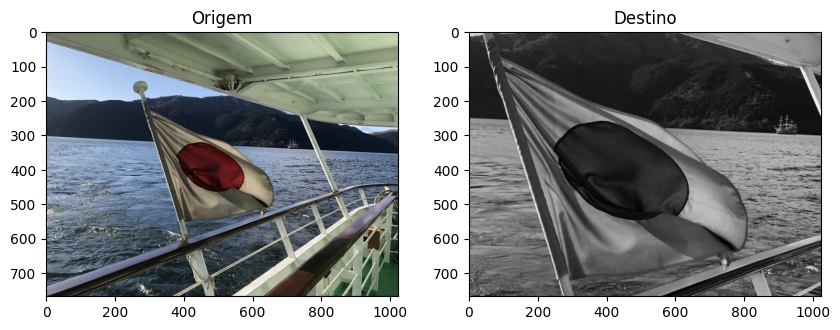

In [59]:
image = mpimg.imread("imagem.jpeg")
image_ = np.zeros_like(image)

# resizing a imagem 
matriz_final = criar_indices(0, image.shape[0], 0, image.shape[1])
matriz_final = np.vstack((matriz_final, np.ones(matriz_final.shape[1])))
matriz_translacao = np.array([[1, 0, -(image.shape[0]/2)], [0, 1, -(image.shape[1]/2)], [0, 0, 1]])
matriz_expansao = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

transformacao = np.linalg.inv(matriz_translacao) @ matriz_expansao @ matriz_translacao

indices_original = np.linalg.inv(transformacao) @ matriz_final
indices_original = indices_original.astype(int)
matriz_final = matriz_final.astype(int)

image_[matriz_final[0,:], matriz_final[1,:], :] = image[indices_original[0,:], indices_original[1,:], :]

# transformação de cor
altura, largura, cores = image_.shape
matriz_imagem = image_.reshape(altura * largura, cores).T

matriz_imagem = matriz_YIQ @ matriz_imagem
matriz_imagem = matriz_pb @ matriz_imagem

matriz_imagem = np.linalg.inv(matriz_YIQ) @ matriz_imagem

matriz_imagem = matriz_imagem.astype(int)
image_ = matriz_imagem.T.reshape(altura, largura, cores)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

Para realizar a transformação matricial para expandir a imagem, primeiro foi necessário transladar a mesma para o ponto de origem, de forma que ela possa ser expandida pelo centro e não pelo começo da imagem. Se for expandida levando em conta o 0,0 da imagem, ela expande no lugar errado, e não no centro que é o que foi pedido. Após transladar a imagem para o 0,0, expandi ela, e agora a mesma está aumentada pelo centro. Depois disso apenas transladei de volta a imagem para o centro dela, de forma que ela apareça por completo ali e corretamente. Após isso, para realizar a transformação de cor, foi necessário passar a imagem para o formato YIQ, para assim poder multiplicar pela matriz correta que leva a imagem a ficar em preto e branco. Após isso, transformamos ela de volta para RGB.

# Exercício 3

* Peso: 2.5 pontos

Suponha que você é um gerente de uma pizzaria e tem os seguintes dados sobre seus ingredientes e vendas de pizzas:

- Cada pizza de queijo requer 2 xícaras de queijo e 1 xícara de molho de tomate.
- Cada pizza de pepperoni requer 1 xícara de queijo, 1 xícara de molho de tomate e 0,5 xícara de pepperoni.
- Cada pizza vegetariana requer 1 xícara de queijo, 1 xícara de molho de tomate e 1 xícara de legumes.
- Cada pizza completa requer 1 xícara de queijo, 1 xícara de molho de tomate, 0,5 xícara de pepperoni e 0,5 xícara de legumes.

*Usando estritamente formulações matriciais*, responda:

Quantas pizzas de cada tipo devem ser vendidas para utilizar todo o estoque de ingredientes abaixo?

- 71 xícaras de queijo
- 52 xícaras de molho de tomate
- 10 xícaras de pepperoni
- 17 xícaras de legumes

Se você vendesse uma pizza de queijo por R$10, uma pizza de pepperoni por R$12, uma pizza vegetariana por R$15 e uma pizza completa por R$20, qual seria o valor total das vendas?

In [3]:
# a ordem é queijo, molho de tomate, pepperoni, legumes
ingredientes = np.array([[2, 1, 0, 0], [1, 1, 0.5, 0], [1, 1, 0, 1], [1, 1, 0.5, 0.5]]).T
estoque = np.array([[71], [52], [10], [17]])

qtd_pizzas = np.linalg.solve(ingredientes, estoque)

preco = np.array([10, 12, 15, 20])

preco_total = preco @ qtd_pizzas

qtd_pizzas, preco_total

(array([[19.],
        [12.],
        [13.],
        [ 8.]]),
 array([689.]))

Transformei as pizzas em matrizes, então cada array dentro do array 'ingredientes' é uma pizza, sendo assim, os números dentro dele representa a quantidade necessária de cada ingrediente para que a pizza seja feita. O array estoque é um array de arrays, e cada um deles representa a quantidade de ingredientes disponível. Para que pudesse ser feita a operação matricial, transpus a matriz de ingredientes e realizei a operação np.linalg.solve, que resolve equações lineares do tipo AX = B. Se fôssemos fazer a mão, teríamos de multiplicar a matriz B pelo inverso da matiz A, mas esse operador já faz isso para a gente, podendo assim descobrir o X, que nesse caso é a quantidade de pizzas. 

Já para realizar o preço total, utilizei o operador @, que nada mais é que uma multiplicação matricial sem ter que realizar ela na mão, portanto ele combina as linhas da matriz de preços (transposta também para que pudessemos realizar a operação de maneira correta), com as colunas da matriz com a quantidade de pizzas, realizando assim, uma multiplicação matricial. 

# Exercício 4

* Peso: 2.5 pontos

Um fazendeiro está com um problema em sua plantação de bananas. Algum animal tem atacado seu estoque e comido suas bananas.

Como já possuia o equipamento, decidiu utilizar um sistema de [Lidar](https://www.faro.com/pt-BR/Resource-Library/Article/Point-Clouds-for-Beginners) para identificar o animal.

O problema é que houve um erro de configuração do equipamento e os dados foram coletados em um sistema de coordenadas diferente do sistema de coordenadas esperado. O fazendeiro precisa de sua ajuda para converter os dados para o sistema de coordenadas do equipamento para poder identificar o animal.

Usando formulações matriciais e os pontos de referência abaixo, faça a conversão dos dados para o sistema de coordenadas correto e exiba a imagem.

* $[1, 0] \rightarrow [0, 0]$
* $[-1, 2] \rightarrow [0, 1]$
* $[-1, 1] \rightarrow [1, 2]$

Por fim, responda: qual o animal que está atacando o estoque de bananas?


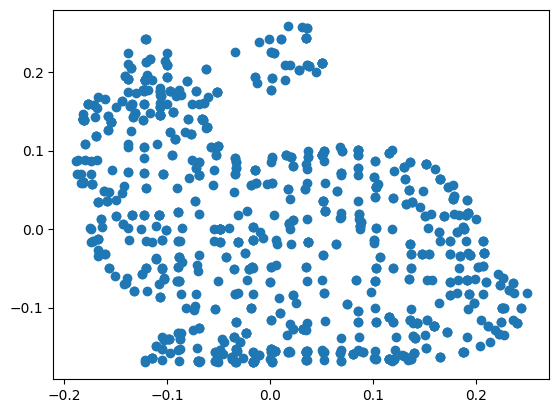

In [26]:
df = pd.read_csv('point_cloud.csv')
points = df.to_numpy()

pts_atual = np.array([[1, 0], [-1, 2], [-1, 1]])
pts_futuro = np.array([[0, 0], [0, 1], [1, 2]])

v = np.vstack((pts_atual.T, np.ones(pts_atual.shape[0])))
w = np.vstack((pts_futuro.T, np.ones(pts_futuro.shape[0])))
B = w @ np.linalg.inv(v)

points = (B @ np.vstack((points.T, np.ones(points.shape[0])))).T

plt.figure()
plt.scatter(points[:,0], points[:,1])
plt.show()

Para encontrar a matriz B, foi necessário utilizarmos os pontos que tínhamos no gráfico e o que queríamos chegar, para que assim, pudéssemos encontrar a matriz B correta que multiplica os pontos atuais para chegar nos pontos futuros. A matriz v é a matriz de pontos atuais transposta e completada com números uns, para que não dê erro na hora de multiplicarmos, assim como a matriz w. Na hora de multiplicar, fizemos a matriz w @ o inverso da matriz v, por que B * v = w, e para encontrar B, basta realizar a multiplicação pelo inverso da matriz v. Depois de encontrar a matriz B correta, apenas multiplicamos a matriz de pontos 'points' por ela, encontrando assim os novos pontos. Podemos então concluir que o animal que estava comendo a plantação era um coelinho!